In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd

In [6]:
dd = pd.read_csv('지역별밀집도(km).csv',encoding='euc-kr')
dd

,Unnamed: 0,지역,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,면적
0,0,서울특별시,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000005
1,1,부산광역시,6.868990,4.252232,4.579327,5.560611,5.233516,8.177369,8.177369,4.906421,2.616758,3.057218
2,2,대구광역시,5.262909,5.816899,5.262909,3.877933,4.154928,4.431923,3.600938,2.492957,2.215962,3.610171
3,3,인천광역시,46.491266,41.287020,39.899221,38.858372,34.694975,32.266326,28.449879,21.163935,20.816985,2.882262
4,4,광주광역시,10.492017,7.153648,9.061287,10.015107,7.630558,9.538197,8.107468,7.630558,5.722918,2.096832
5,5,대전광역시,14.786770,11.374438,10.805716,6.824663,8.530829,7.962107,5.118497,2.843610,3.412331,1.758329
6,6,울산광역시,34.766904,27.040925,38.629893,34.766904,29.616251,27.684757,25.753262,18.671115,19.314946,1.553201
7,7,세종특별자치시,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.593988,22.645913,20.693679,5.122337
8,8,경기도,98.013728,92.103353,90.246889,89.868019,83.730321,70.356202,75.167854,77.289527,74.334339,26.394262
9,9,강원도,208.216470,200.520584,198.810387,203.940978,196.672641,199.665485,194.107346,221.898045,226.173537,2.338912


In [11]:
dd = dd.drop(['면적'],axis=1)

In [12]:
dd.head()

,지역,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
0,서울특별시,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,부산광역시,6.868990,4.252232,4.579327,5.560611,5.233516,8.177369,8.177369,4.906421,2.616758
2,대구광역시,5.262909,5.816899,5.262909,3.877933,4.154928,4.431923,3.600938,2.492957,2.215962
3,인천광역시,46.491266,41.287020,39.899221,38.858372,34.694975,32.266326,28.449879,21.163935,20.816985
4,광주광역시,10.492017,7.153648,9.061287,10.015107,7.630558,9.538197,8.107468,7.630558,5.722918


In [172]:
dd = pd.read_csv('지역별밀집도(완성).csv',encoding='euc-kr')

In [173]:
dd

,지역,year,밀집도,발생건수
0,강원도,2012,208.216470,0
1,강원도,2013,200.520584,0
2,강원도,2014,198.810387,1
3,강원도,2015,203.940978,0
4,강원도,2016,196.672641,2
...,...,...,...,...
139,충청북도,2016,267.416844,85
140,충청북도,2017,250.960423,0
141,충청북도,2018,258.013175,1
142,충청북도,2019,247.140183,0


In [15]:
from scipy import stats

In [ ]:
정규성 검정
1. shapiro-wilk test => 표본이 2000 미만인 dataset에 적합 (stats.shapiro)
2. kolmogorove-smirnov test => 표본이 2000초과인 dataset에 적합 (stats.kstest)
> 귀무가설(정규화 따른다), 대립가설(정규화 따르지 않는다)

In [163]:
dd_ = dd['밀집도']

In [164]:
dd_.head()

0    208.216470
1    200.520584
2    198.810387
3    203.940978
4    196.672641
Name: 밀집도, dtype: float64

In [165]:
dd_.describe()

count    144.000000
mean     134.895044
std      150.298224
min        0.000000
25%        7.082484
50%       58.423741
75%      240.739568
max      488.632041
Name: 밀집도, dtype: float64

In [30]:
# 정규성 검정  > 대립가설(정규화 따르지 않는다) 채택
test_stat, p_value = stats.shapiro(dd_)
print("test_stat: %f, pvalue=%f"%(test_stat, p_value))

test_stat: 0.817360, pvalue=0.000000


In [166]:
def get_outlier(df=None, column=None, weight=1.5):
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [167]:
outlier_idx = get_outlier(df=dd, column='밀집도', weight=1.5)
dd.drop(outlier_idx, axis=0, inplace=True)

In [171]:
dd

,지역,year,밀집도,발생건수
0,강원도,2012,208.216470,0
1,강원도,2013,200.520584,0
2,강원도,2014,198.810387,1
3,강원도,2015,203.940978,0
4,강원도,2016,196.672641,2
...,...,...,...,...
139,충청북도,2016,267.416844,85
140,충청북도,2017,250.960423,0
141,충청북도,2018,258.013175,1
142,충청북도,2019,247.140183,0


In [174]:
dd.query('지역=="서울특별시"')

,지역,year,밀집도,발생건수
72,서울특별시,2012,0.0,0
73,서울특별시,2013,0.0,0
74,서울특별시,2014,0.0,0
75,서울특별시,2015,0.0,0
76,서울특별시,2016,0.0,0
77,서울특별시,2017,0.0,0
78,서울특별시,2018,0.0,0
79,서울특별시,2019,0.0,0
80,서울특별시,2020,0.0,0


In [168]:
dd.describe()

,year,밀집도,발생건수
count,144.000000,144.000000,144.000000
mean,2016.000000,134.895044,5.145833
std,2.591001,150.298224,15.836123
min,2012.000000,0.000000,0.000000
25%,2014.000000,7.082484,0.000000
50%,2016.000000,58.423741,0.000000
75%,2018.000000,240.739568,2.000000
max,2020.000000,488.632041,106.000000


In [26]:
def get_outlier(df=None, column=None, weight=1.5):
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [27]:
outlier_idx = get_outlier(df=dd, column='밀집도', weight=1.5)
dd.drop(outlier_idx, axis=0, inplace=True)

In [32]:
dd.describe()

,year,밀집도,발생건수
count,144.000000,144.000000,144.000000
mean,2016.000000,134.895044,5.145833
std,2.591001,150.298224,15.836123
min,2012.000000,0.000000,0.000000
25%,2014.000000,7.082484,0.000000
50%,2016.000000,58.423741,0.000000
75%,2018.000000,240.739568,2.000000
max,2020.000000,488.632041,106.000000


In [28]:
dd2 = dd['밀집도']

In [29]:
dd2.head()

0    208.216470
1    200.520584
2    198.810387
3    203.940978
4    196.672641
Name: 밀집도, dtype: float64

In [31]:
dd2.describe()

count    144.000000
mean     134.895044
std      150.298224
min        0.000000
25%        7.082484
50%       58.423741
75%      240.739568
max      488.632041
Name: 밀집도, dtype: float64

In [39]:
dd22 = dd['발생건수']

In [40]:
dd22.describe()

count    144.000000
mean       5.145833
std       15.836123
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max      106.000000
Name: 발생건수, dtype: float64

In [33]:
# 정규성 검정  > 대립가설(정규화 따르지 않는다) 채택
test_stat, p_value = stats.shapiro(dd2)
print("test_stat: %f, pvalue=%f"%(test_stat, p_value))

test_stat: 0.817360, pvalue=0.000000


In [37]:
stats.kstest(dd2, 'norm')

KstestResult(statistic=0.8825546865774243, pvalue=2.704913719466371e-134)

In [44]:
from scipy.stats import bartlett
bartlett(dd2, dd22)

BartlettResult(statistic=446.94852501966875, pvalue=3.3281733600504666e-99)

In [45]:
from scipy.stats import levene
levene(dd2, dd22)

LeveneResult(statistic=148.35199324235194, pvalue=8.96920388313653e-28)

In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [58]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris

In [175]:
dddd = stats.wilcoxon(dd2, dd22)

In [176]:
dddd

WilcoxonResult(statistic=94.0, pvalue=2.6023189038826884e-22)

In [ ]:
Wilcoxon Singed-Ranked Test - stats.wilcoxon

In [127]:
dddf = dd.drop(['year','지역'],axis=1)
dddf

,밀집도,발생건수
0,208.216470,0
1,200.520584,0
2,198.810387,1
3,203.940978,0
4,196.672641,2
...,...,...
139,267.416844,85
140,250.960423,0
141,258.013175,1
142,247.140183,0


In [128]:
from sklearn import cluster

In [129]:
x=dddf['밀집도']
y=dddf['발생건수']
xy=pd.concat([x,y], axis=1)
xy

,밀집도,발생건수
0,208.216470,0
1,200.520584,0
2,198.810387,1
3,203.940978,0
4,196.672641,2
...,...,...
139,267.416844,85
140,250.960423,0
141,258.013175,1
142,247.140183,0


In [148]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(xy)
Normalized_Values = scaler.transform(xy)

In [149]:
Normalized_Values

array([[0.4261212 , 0.        , 0.4       ],
       [0.41037134, 0.        , 0.4       ],
       [0.40687137, 0.00943396, 0.4       ],
       [0.41737127, 0.        , 0.4       ],
       [0.40249641, 0.01886792, 0.4       ],
       [0.40862135, 0.01886792, 0.4       ],
       [0.39724645, 0.        , 0.4       ],
       [0.45412095, 0.        , 0.4       ],
       [0.46287087, 0.        , 0.4       ],
       [0.20058801, 0.        , 0.7       ],
       [0.18849226, 0.        , 0.7       ],
       [0.18469295, 0.30188679, 0.3       ],
       [0.18391758, 0.26415094, 0.3       ],
       [0.1713566 , 1.        , 0.6       ],
       [0.14398606, 0.19811321, 0.3       ],
       [0.15383325, 0.04716981, 0.7       ],
       [0.15817532, 0.        , 0.7       ],
       [0.15212744, 0.11320755, 0.7       ],
       [0.26573905, 0.        , 0.7       ],
       [0.24981461, 0.        , 0.7       ],
       [0.23189962, 0.02830189, 0.7       ],
       [0.22725499, 0.01886792, 0.7       ],
       [0.

In [150]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=11, random_state =0).fit(Normalized_Values)

In [152]:
kmeans.labels_

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  5, 10, 10,  8, 10,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  9,  9,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  0,  0,  4,  6,  7,  7,  0,  0,  0,  2,  3,
        3,  3,  3,  3,  3,  3,  3,  9,  9,  6,  9,  6,  0,  0,  0,  0,  2,
        2,  4,  7,  4,  2,  2,  2,  2])

In [153]:
kmeans.cluster_centers_

array([[ 7.71680989e-01,  2.41745283e-02,  1.00000000e-01],
       [ 2.42913802e-02,  4.97903564e-03, -3.60822483e-16],
       [ 5.20976037e-01,  4.04312668e-03,  1.00000000e+00],
       [ 4.32954523e-01,  2.77469478e-03,  4.00000000e-01],
       [ 6.06775300e-01,  7.13836478e-01,  2.00000000e-01],
       [ 2.10093438e-01,  1.95417790e-02,  7.00000000e-01],
       [ 8.47960017e-01,  3.96226415e-01,  9.00000000e-01],
       [ 6.84525116e-01,  2.48427673e-01,  5.00000000e-01],
       [ 1.71356596e-01,  1.00000000e+00,  6.00000000e-01],
       [ 9.21526075e-01,  1.13207547e-02,  8.00000000e-01],
       [ 1.70865528e-01,  2.54716981e-01,  3.00000000e-01]])

In [154]:
kmeans.inertia_

0.3331007839643499

In [155]:
xy

,밀집도,발생건수,risk
0,208.216470,0,4
1,200.520584,0,4
2,198.810387,1,4
3,203.940978,0,4
4,196.672641,2,4
...,...,...,...
139,267.416844,85,2
140,250.960423,0,10
141,258.013175,1,10
142,247.140183,0,10


C:\Users\user\.conda\envs\my_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(3.674999999999997, 0.5, '발생건수')

C:\Users\user\.conda\envs\my_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\my_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\my_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\my_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\my_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\my_env\lib\site-packages\matplotlib\backends\backend_agg.py

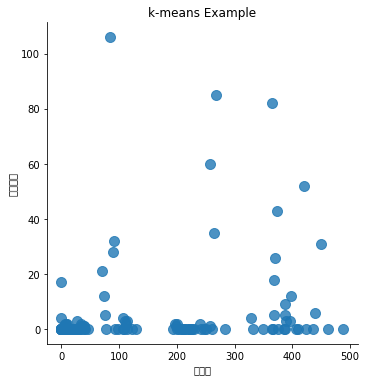

In [156]:
sb.lmplot('밀집도', '발생건수', data=xy, fit_reg=False, scatter_kws={"s": 100})
plt.title('k-means Example')
plt.xlabel('밀집도')
plt.ylabel('발생건수')

In [157]:
points=Normalized_Values
kmeans=KMeans(n_clusters=11).fit(points)

kmeans.cluster_centers_

array([[ 2.42913802e-02,  4.97903564e-03, -3.60822483e-16],
       [ 4.32954523e-01,  2.77469478e-03,  4.00000000e-01],
       [ 5.20976037e-01,  4.04312668e-03,  1.00000000e+00],
       [ 2.10093438e-01,  1.95417790e-02,  7.00000000e-01],
       [ 7.71680989e-01,  2.41745283e-02,  1.00000000e-01],
       [ 1.71356596e-01,  1.00000000e+00,  6.00000000e-01],
       [ 6.06775300e-01,  7.13836478e-01,  2.00000000e-01],
       [ 8.47960017e-01,  3.96226415e-01,  9.00000000e-01],
       [ 9.21526075e-01,  1.13207547e-02,  8.00000000e-01],
       [ 1.70865528e-01,  2.54716981e-01,  3.00000000e-01],
       [ 6.84525116e-01,  2.48427673e-01,  5.00000000e-01]])

In [158]:
kmeans.labels_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  3,  9,  9,  5,  9,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  8,  8,  4,  4,  4,  4,  4,
        4,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  4,  4,  6,  7, 10, 10,  4,  4,  4,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  8,  8,  7,  8,  7,  4,  4,  4,  4,  2,
        2,  6, 10,  6,  2,  2,  2,  2])

In [159]:
xy['risk']=kmeans.labels_
xy

,밀집도,발생건수,risk
0,208.216470,0,1
1,200.520584,0,1
2,198.810387,1,1
3,203.940978,0,1
4,196.672641,2,1
...,...,...,...
139,267.416844,85,6
140,250.960423,0,2
141,258.013175,1,2
142,247.140183,0,2


In [160]:
xy.to_csv("밀집도리스크1.csv", encoding='euc-kr')

In [177]:
x=np.reshape(dd['밀집도'].values, ((1,)+dd['발생건수'].values.shape))

In [179]:
x=np.expand_dims(dd['밀집도'].values, axis=1)
x

array([[208.2164699 ],
       [200.5205839 ],
       [198.8103871 ],
       [203.9409777 ],
       [196.672641  ],
       [199.6654855 ],
       [194.1073456 ],
       [221.8980449 ],
       [226.1735371 ],
       [ 98.01373109],
       [ 92.10335535],
       [ 90.24689117],
       [ 89.86802093],
       [ 83.73032304],
       [ 70.35620357],
       [ 75.16785562],
       [ 77.28952896],
       [ 74.33434109],
       [129.8486137 ],
       [122.0674234 ],
       [113.3135842 ],
       [111.0440704 ],
       [109.4229891 ],
       [105.8566102 ],
       [107.1534752 ],
       [113.7999086 ],
       [107.8019078 ],
       [488.6320409 ],
       [424.223655  ],
       [389.1138205 ],
       [407.2740797 ],
       [385.2396319 ],
       [365.3844152 ],
       [367.0793727 ],
       [332.211675  ],
       [328.5796232 ],
       [ 10.49201844],
       [  7.15364893],
       [  9.06128865],
       [ 10.01510851],
       [  7.63055886],
       [  9.53819858],
       [  8.10746879],
       [  7

In [180]:
y=dd['발생건수'].values
y

array([  0,   0,   1,   0,   2,   2,   0,   0,   0,   0,   0,  32,  28,
       106,  21,   5,   0,  12,   0,   0,   3,   2,   3,   4,   0,   0,
         0,   0,   0,   3,   0,   0,   0,   0,   0,   4,   0,   0,   0,
         2,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   2,   1,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   4,   0,  17,   0,   0,   0,   0,   0,
         0,   1,   2,   0,   3,   0,   0,   0,   0,   0,   1,   0,   1,
         0,   0,   0,   0,   0,   0,  82,  43,  18,  26,   5,   0,   9,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31,   6,
        52,  12,   3,   0,   5,   0,   0,  60,  35,  85,   0,   1,   0,
         2], dtype=int64)

In [181]:
regr=linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [187]:
print(regr.coef_, regr.intercept_)

[0.02607055] 1.6290458740281175


In [188]:
dddf

,밀집도,발생건수
0,208.216470,0
1,200.520584,0
2,198.810387,1
3,203.940978,0
4,196.672641,2
...,...,...
139,267.416844,85
140,250.960423,0
141,258.013175,1
142,247.140183,0


In [191]:
dddf.to_csv('발생건수평균.csv', encoding='euc-kr')

In [ ]:
dddf['발생건수'].

In [190]:
from statsmodels.formula.api import ols
model = ols('밀집도 ~ 발생건수', data=dddf).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    밀집도   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     9.261
Date:                Fri, 01 Oct 2021   Prob (F-statistic):            0.00279
Time:                        10:48:40   Log-Likelihood:                -921.09
No. Observations:                 144   AIC:                             1846.
Df Residuals:                     142   BIC:                             1852.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    122.8109     12.809      9.588      0.000      97.490     148.132
발생건수           2.3483      0.772      3.043      0.003       0.823       3.874
==============================================================================
Omnibus:                       17.588   Durbin-Watson:                   0.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.216
Skew:                           0.817   Prob(JB):                     0.000111
Kurtosis:                       2.396   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

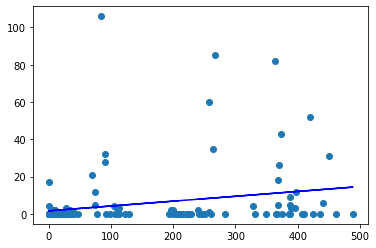

In [182]:
plt.scatter(x,y)
plt.plot(x,regr.predict(x), c='blue')
plt.show()

# x축=밀집도
# y축=발생건수

In [195]:
mlzp_gun = pd.read_csv('지역별밀집도(완성2).csv', encoding='euc-kr')

In [196]:
mlzp_gun

,지역,year,밀집도,발생건수,발생건수평균
0,강원도,2012,208.216470,0,0.555556
1,강원도,2013,200.520584,0,0.555556
2,강원도,2014,198.810387,1,0.555556
3,강원도,2015,203.940978,0,0.555556
4,강원도,2016,196.672641,2,0.555556
...,...,...,...,...,...
139,충청북도,2016,267.416844,85,20.333333
140,충청북도,2017,250.960423,0,20.333333
141,충청북도,2018,258.013175,1,20.333333
142,충청북도,2019,247.140183,0,20.333333


In [198]:
x=np.reshape(mlzp_gun['밀집도'].values, ((1,)+mlzp_gun['발생건수평균'].values.shape))

In [199]:
x=np.expand_dims(mlzp_gun['밀집도'].values, axis=1)
x

array([[208.2164699 ],
       [200.5205839 ],
       [198.8103871 ],
       [203.9409777 ],
       [196.672641  ],
       [199.6654855 ],
       [194.1073456 ],
       [221.8980449 ],
       [226.1735371 ],
       [ 98.01373109],
       [ 92.10335535],
       [ 90.24689117],
       [ 89.86802093],
       [ 83.73032304],
       [ 70.35620357],
       [ 75.16785562],
       [ 77.28952896],
       [ 74.33434109],
       [129.8486137 ],
       [122.0674234 ],
       [113.3135842 ],
       [111.0440704 ],
       [109.4229891 ],
       [105.8566102 ],
       [107.1534752 ],
       [113.7999086 ],
       [107.8019078 ],
       [488.6320409 ],
       [424.223655  ],
       [389.1138205 ],
       [407.2740797 ],
       [385.2396319 ],
       [365.3844152 ],
       [367.0793727 ],
       [332.211675  ],
       [328.5796232 ],
       [ 10.49201844],
       [  7.15364893],
       [  9.06128865],
       [ 10.01510851],
       [  7.63055886],
       [  9.53819858],
       [  8.10746879],
       [  7

In [200]:
y=mlzp_gun['발생건수평균'].values
y

array([ 0.55555556,  0.55555556,  0.55555556,  0.55555556,  0.55555556,
        0.55555556,  0.55555556,  0.55555556,  0.55555556, 22.66666667,
       22.66666667, 22.66666667, 22.66666667, 22.66666667, 22.66666667,
       22.66666667, 22.66666667, 22.66666667,  1.33333333,  1.33333333,
        1.33333333,  1.33333333,  1.33333333,  1.33333333,  1.33333333,
        1.33333333,  1.33333333,  0.77777778,  0.77777778,  0.77777778,
        0.77777778,  0.77777778,  0.77777778,  0.77777778,  0.77777778,
        0.77777778,  0.22222222,  0.22222222,  0.22222222,  0.22222222,
        0.22222222,  0.22222222,  0.22222222,  0.22222222,  0.22222222,
        0.22222222,  0.22222222,  0.22222222,  0.22222222,  0.22222222,
        0.22222222,  0.22222222,  0.22222222,  0.22222222,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.55555556,  0.55555556,
        0.55555556,  0.55555556,  0.55555556,  0.55555556,  0.55

In [201]:
regr=linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [202]:
print(regr.coef_, regr.intercept_)

[0.02609994] 1.6250809620105762


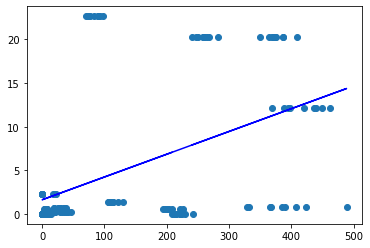

In [203]:
plt.scatter(x,y)
plt.plot(x,regr.predict(x), c='blue')
plt.show()

# x축=밀집도
# y축=발생건수

In [235]:
mlzp_gun = pd.read_csv('지역별밀집도(완성2).csv', encoding='euc-kr')

In [236]:
x=np.reshape(mlzp_gun['밀집도평균'].values, ((1,)+mlzp_gun['발생건수평균'].values.shape))

In [237]:
x=np.expand_dims(mlzp_gun['밀집도평균'].values, axis=1)
x

array([[205.5561636 ],
       [205.5561636 ],
       [205.5561636 ],
       [205.5561636 ],
       [205.5561636 ],
       [205.5561636 ],
       [205.5561636 ],
       [205.5561636 ],
       [205.5561636 ],
       [ 83.45669454],
       [ 83.45669454],
       [ 83.45669454],
       [ 83.45669454],
       [ 83.45669454],
       [ 83.45669454],
       [ 83.45669454],
       [ 83.45669454],
       [ 83.45669454],
       [113.3676203 ],
       [113.3676203 ],
       [113.3676203 ],
       [113.3676203 ],
       [113.3676203 ],
       [113.3676203 ],
       [113.3676203 ],
       [113.3676203 ],
       [113.3676203 ],
       [387.5264793 ],
       [387.5264793 ],
       [387.5264793 ],
       [387.5264793 ],
       [387.5264793 ],
       [387.5264793 ],
       [387.5264793 ],
       [387.5264793 ],
       [387.5264793 ],
       [  8.37241875],
       [  8.37241875],
       [  8.37241875],
       [  8.37241875],
       [  8.37241875],
       [  8.37241875],
       [  8.37241875],
       [  8

In [238]:
y=mlzp_gun['발생건수평균'].values
y

array([ 0.55555556,  0.55555556,  0.55555556,  0.55555556,  0.55555556,
        0.55555556,  0.55555556,  0.55555556,  0.55555556, 22.66666667,
       22.66666667, 22.66666667, 22.66666667, 22.66666667, 22.66666667,
       22.66666667, 22.66666667, 22.66666667,  1.33333333,  1.33333333,
        1.33333333,  1.33333333,  1.33333333,  1.33333333,  1.33333333,
        1.33333333,  1.33333333,  0.77777778,  0.77777778,  0.77777778,
        0.77777778,  0.77777778,  0.77777778,  0.77777778,  0.77777778,
        0.77777778,  0.22222222,  0.22222222,  0.22222222,  0.22222222,
        0.22222222,  0.22222222,  0.22222222,  0.22222222,  0.22222222,
        0.22222222,  0.22222222,  0.22222222,  0.22222222,  0.22222222,
        0.22222222,  0.22222222,  0.22222222,  0.22222222,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.55555556,  0.55555556,
        0.55555556,  0.55555556,  0.55555556,  0.55555556,  0.55

In [239]:
regr=linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [240]:
print(regr.coef_, regr.intercept_)

[0.02325235] 1.8998626842664548


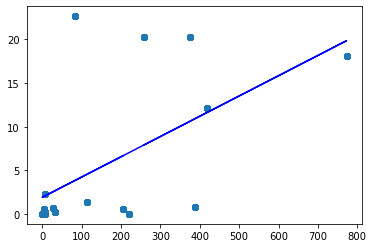

In [241]:
plt.scatter(x,y)
plt.plot(x,regr.predict(x), c='blue')
plt.show()

# x축=밀집도
# y축=발생건수

In [242]:
from statsmodels.formula.api import ols
model = ols('밀집도평균 ~ 발생건수평균', data=mlzp_gun).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  밀집도평균   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     72.35
Date:                Fri, 01 Oct 2021   Prob (F-statistic):           1.64e-14
Time:                        12:18:05   Log-Likelihood:                -1004.0
No. Observations:                 153   AIC:                             2012.
Df Residuals:                     151   BIC:                             2018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.0881     16.967      5.310      0.000      56.565     123.611
발생건수평균        13.9306      1.638      8.506      0.000      10.695      17.167
==============================================================================
Omnibus:                       17.614   Durbin-Watson:                   0.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.932
Skew:                           0.820   Prob(JB):                     4.70e-05
Kurtosis:                       3.659   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [243]:
mlzp_gun

,지역,year,밀집도,발생건수,밀집도평균,발생건수평균
0,강원도,2012,208.216470,0,205.556164,0.555556
1,강원도,2013,200.520584,0,205.556164,0.555556
2,강원도,2014,198.810387,1,205.556164,0.555556
3,강원도,2015,203.940978,0,205.556164,0.555556
4,강원도,2016,196.672641,2,205.556164,0.555556
...,...,...,...,...,...,...
148,충청북도,2016,267.416844,85,258.894769,20.333333
149,충청북도,2017,250.960423,0,258.894769,20.333333
150,충청북도,2018,258.013175,1,258.894769,20.333333
151,충청북도,2019,247.140183,0,258.894769,20.333333


In [281]:
yes = pd.read_csv('발생있는밀집도.csv', encoding='utf-8')
no = pd.read_csv('발생없는밀집도.csv', encoding='euc-kr')

In [290]:
yes.head()

,지역,year,밀집도,발생건수,밀집도평균,발생건수평균
0,강원도,2014,198.810387,1,205.556164,0.555556
1,대구광역시,2014,5.262910,1,4.124152,0.222222
2,대구광역시,2017,4.431924,1,4.124152,0.222222
3,부산광역시,2016,5.233516,1,5.596955,0.555556
4,울산광역시,2014,38.629900,1,28.471667,0.666667


In [291]:
no.head()

,지역,year,밀집도,발생건수,밀집도평균,발생건수평균
0,강원도,2012,208.216470,0,205.556164,0.555556
1,강원도,2013,200.520584,0,205.556164,0.555556
2,강원도,2015,203.940978,0,205.556164,0.555556
3,강원도,2018,194.107346,0,205.556164,0.555556
4,강원도,2019,221.898045,0,205.556164,0.555556


In [292]:
AI_occur_1=yes.query("지역=='강원도'")
AI_occur_no_1=no.query("지역=='강원도'")

AI_occur_2=yes.query("지역=='경기도'")
AI_occur_no_2=no.query("지역=='경기도'")

AI_occur_3=yes.query("지역=='경상남도'")
AI_occur_no_3=no.query("지역=='경상남도'")

AI_occur_4=yes.query("지역=='경상북도'")
AI_occur_no_4=no.query("지역=='경상북도'")

AI_occur_5=yes.query("지역=='광주광역시'")
AI_occur_no_5=no.query("지역=='광주광역시'")

AI_occur_6=yes.query("지역=='대구광역시'")
AI_occur_no_6=no.query("지역=='대구광역시'")

AI_occur_7=yes.query("지역=='대전광역시'")
AI_occur_no_7=no.query("지역=='대전광역시'")

AI_occur_8=yes.query("지역=='부산광역시'")
AI_occur_no_8=no.query("지역=='부산광역시'")

AI_occur_9=yes.query("지역=='서울특별시'")
AI_occur_no_9=no.query("지역=='서울특별시'")

AI_occur_10=yes.query("지역=='세종특별자치시'")
AI_occur_no_10=no.query("지역=='세종특별자치시'")

AI_occur_11=yes.query("지역=='울산광역시'")
AI_occur_no_11=no.query("지역=='울산광역시'")

AI_occur_12=yes.query("지역=='인천광역시'")
AI_occur_no_12=no.query("지역=='인천광역시'")

AI_occur_13=yes.query("지역=='전라남도'")
AI_occur_no_13=no.query("지역=='전라남도'")

AI_occur_14=yes.query("지역=='전라북도'")
AI_occur_no_14=no.query("지역=='전라북도'")

AI_occur_15=yes.query("지역=='제주도'")
AI_occur_no_15=no.query("지역=='제주도'")

AI_occur_16=yes.query("지역=='충청남도'")
AI_occur_no_16=no.query("지역=='충청남도'")

AI_occur_17=yes.query("지역=='충청북도'")
AI_occur_no_17=no.query("지역=='충청북도'")

In [293]:
AI_occur_1s=AI_occur_1['밀집도'].mean()
print(AI_occur_1s)

AI_occur_2s=AI_occur_2['밀집도'].mean()
print(AI_occur_2s)

AI_occur_3s=AI_occur_3['밀집도'].mean()
print(AI_occur_3s)

AI_occur_4s=AI_occur_4['밀집도'].mean()
print(AI_occur_4s)

AI_occur_5s=AI_occur_5['밀집도'].mean()
print(AI_occur_5s)

AI_occur_6s=AI_occur_6['밀집도'].mean()
print(AI_occur_6s)

AI_occur_7s=AI_occur_7['밀집도'].mean()
print(AI_occur_7s)

AI_occur_8s=AI_occur_8['밀집도'].mean()
print(AI_occur_8s)

AI_occur_9s=AI_occur_9['밀집도'].mean()
print(AI_occur_9s)

AI_occur_10s=AI_occur_10['밀집도'].mean()
print(AI_occur_10s)

AI_occur_11s=AI_occur_11['밀집도'].mean()
print(AI_occur_11s)

AI_occur_12s=AI_occur_12['밀집도'].mean()
print(AI_occur_12s)

AI_occur_13s=AI_occur_13['밀집도'].mean()
print(AI_occur_13s)

AI_occur_14s=AI_occur_14['밀집도'].mean()
print(AI_occur_14s)

AI_occur_15s=AI_occur_15['밀집도'].mean()
print(AI_occur_15s)

AI_occur_16s=AI_occur_16['밀집도'].mean()
print(AI_occur_16s)

AI_occur_17s=AI_occur_17['밀집도'].mean()
print(AI_occur_17s)

198.38283786666668
80.61727257000001
109.90931347499999
358.84672185
10.01510851
4.847417157500001
nan
6.323832102666667
nan
0.0
33.69385761
37.29710807
375.0364387166666
776.4461383400001
nan
412.08339826666673
257.66053754


In [294]:
# 2012~2020 밀집도 평균 데이터프레임 생성
AI_occur_sdf=pd.DataFrame(
    data={'밀집도(발생)':['198.38283786666668',
                            '80.61727257000001',
                            '109.90931347499999',
                            '358.84672185',
                            '10.01510851',
                            '4.847417157500001',
                            '0.0',
                            '6.323832102666667',
                            '0.0',
                            '0.0',
                            '33.69385761',
                            '37.29710807',
                            '375.0364387166666',
                            '776.4461383400001',
                            '0.0',
                            '412.08339826666673',
                            '257.66053754']},
    index=['강원도','경기도','경상남도','경상북도','광주광역시','대구광역시',
           '대전광역시','부산광역시','서울특별시','세종특별자치시','울산광역시',
           '인천광역시', '전라남도','전라북도','제주도','충청남도','충청북도'],
    columns=['밀집도(발생)'])
print(AI_occur_sdf)

                    밀집도(발생)
강원도      198.38283786666668
경기도       80.61727257000001
경상남도     109.90931347499999
경상북도           358.84672185
광주광역시           10.01510851
대구광역시     4.847417157500001
대전광역시                   0.0
부산광역시     6.323832102666667
서울특별시                   0.0
세종특별자치시                 0.0
울산광역시           33.69385761
인천광역시           37.29710807
전라남도      375.0364387166666
전라북도      776.4461383400001
제주도                     0.0
충청남도     412.08339826666673
충청북도           257.66053754


In [295]:
AI_occur_no_1s=AI_occur_no_1['밀집도'].mean()
print(AI_occur_no_1s)

AI_occur_no_2s=AI_occur_no_2['밀집도'].mean()
print(AI_occur_no_2s)

AI_occur_no_3s=AI_occur_no_3['밀집도'].mean()
print(AI_occur_no_3s)

AI_occur_no_4s=AI_occur_no_4['밀집도'].mean()
print(AI_occur_no_4s)

AI_occur_no_5s=AI_occur_no_5['밀집도'].mean()
print(AI_occur_no_5s)

AI_occur_no_6s=AI_occur_no_6['밀집도'].mean()
print(AI_occur_no_6s)

AI_occur_no_7s=AI_occur_no_7['밀집도'].mean()
print(AI_occur_no_7s)

AI_occur_no_8s=AI_occur_no_8['밀집도'].mean()
print(AI_occur_no_8s)

AI_occur_no_9s=AI_occur_no_9['밀집도'].mean()
print(AI_occur_no_9s)

AI_occur_no_10s=AI_occur_no_10['밀집도'].mean()
print(AI_occur_no_10s)

AI_occur_no_11s=AI_occur_no_11['밀집도'].mean()
print(AI_occur_no_11s)

AI_occur_no_12s=AI_occur_no_12['밀집도'].mean()
print(AI_occur_no_12s)

AI_occur_no_13s=AI_occur_no_13['밀집도'].mean()
print(AI_occur_no_13s)

AI_occur_no_14s=AI_occur_no_14['밀집도'].mean()
print(AI_occur_no_14s)

AI_occur_no_15s=AI_occur_no_15['밀집도'].mean()
print(AI_occur_no_15s)

AI_occur_no_16s=AI_occur_no_16['밀집도'].mean()
print(AI_occur_no_16s)

AI_occur_no_17s=AI_occur_no_17['밀집도'].mean()
print(AI_occur_no_17s)

209.14282651666667
89.13553846666666
116.13426574
395.72069577142855
8.167082532750001
3.9175044782857142
7.962109458444445
5.233516222833333
0.0
8.561940157142857
25.86057224166667
32.76197798571428
377.99456349999997
767.40295375
220.91684471111108
428.70302266666664
260.43755862499995


In [296]:
# 2012~2020 밀집도 평균 데이터프레임 생성
AI_occur_no_sdf=pd.DataFrame(
    data={'밀집도(발생무)':['209.14282651666667',
                            '89.13553846666666',
                            '116.13426574',
                            '395.72069577142855',
                            '8.167082532750001',
                            '3.9175044782857142',
                            '7.962109458444445',
                            '5.233516222833333',
                            '0.0',
                            '8.561940157142857',
                            '25.86057224166667',
                            '32.76197798571428',
                            '377.99456349999997',
                            '767.40295375',
                            '220.91684471111108',
                            '428.70302266666664',
                            '260.43755862499995']},
    index=['강원도','경기도','경상남도','경상북도','광주광역시','대구광역시',
           '대전광역시','부산광역시','서울특별시','세종특별자치시','울산광역시',
           '인천광역시', '전라남도','전라북도','제주도','충청남도','충청북도'],
    columns=['밀집도(발생무)'])
print(AI_occur_no_sdf)

                   밀집도(발생무)
강원도      209.14282651666667
경기도       89.13553846666666
경상남도           116.13426574
경상북도     395.72069577142855
광주광역시     8.167082532750001
대구광역시    3.9175044782857142
대전광역시     7.962109458444445
부산광역시     5.233516222833333
서울특별시                   0.0
세종특별자치시   8.561940157142857
울산광역시     25.86057224166667
인천광역시     32.76197798571428
전라남도     377.99456349999997
전라북도           767.40295375
제주도      220.91684471111108
충청남도     428.70302266666664
충청북도     260.43755862499995


In [298]:
AI_occur_ssdf=pd.concat([AI_occur_sdf,AI_occur_no_sdf],axis=1)
AI_occur_ssdf

,밀집도(발생),밀집도(발생무)
강원도,198.38283786666668,209.14282651666667
경기도,80.61727257000001,89.13553846666666
경상남도,109.90931347499999,116.13426574
경상북도,358.84672185,395.72069577142855
광주광역시,10.01510851,8.167082532750001
대구광역시,4.847417157500001,3.9175044782857142
대전광역시,0.0,7.962109458444445
부산광역시,6.323832102666667,5.233516222833333
서울특별시,0.0,0.0
세종특별자치시,0.0,8.561940157142857


In [299]:
# 정규성 검정  > 대립가설(정규화 따르지 않는다) 채택
test_stat, p_value = stats.shapiro(AI_occur_sdf)
print("test_stat: %f, pvalue=%f"%(test_stat, p_value))
test_stat, p_value = stats.shapiro(AI_occur_no_sdf)
print("test_stat: %f, pvalue=%f"%(test_stat, p_value))

test_stat: 0.211135, pvalue=0.000000
test_stat: 0.008537, pvalue=0.000000


In [301]:
# 독립성 검정  > 귀무가설(두 변수는 서로 독립적이다) 채택
crosstab=pd.crosstab(AI_occur_ssdf['밀집도(발생)'],AI_occur_ssdf['밀집도(발생무)'])
chi2 = stats.chi2_contingency(crosstab)
print("test_stat: %f, pvalue=%f"%(chi2[0], chi2[1]))
#pvalue 5%이상 귀무가설 채택.

test_stat: 221.000000, pvalue=0.255562


In [302]:
# 비모수적 데이터 이며 독립적이므로 Mann-Whitney U test 이용 (크기 차이 알수 없음)
result_brids=stats.mannwhitneyu(AI_occur_ssdf['밀집도(발생)'],AI_occur_ssdf['밀집도(발생무)'])
result_brids

MannwhitneyuResult(statistic=105.0, pvalue=0.0892553315778628)

In [303]:
print("u검정 통계량: %.3f, pvalue=%.3f"%(result_brids))   # 유의수준 5%내이므로 귀무가설 기각 대립가설 채택

u검정 통계량: 105.000, pvalue=0.089
